# Q2. Do older planes suffer more delays?

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Opening the datasets with necessary columns and concatenating the two years

In [2]:
dataset_2006 = pd.read_csv("2006.csv", usecols = ['TailNum','DepDelay'])
dataset_2007 = pd.read_csv("2007.csv", usecols = ['TailNum','DepDelay'])
plane_data = pd.read_csv("plane-data.csv", usecols = ['tailnum','year'])
main_dataset = pd.concat([dataset_2006, dataset_2007])
main_dataset

,TailNum,DepDelay
0,N657AW,-2.0
1,N834AW,0.0
2,N605AW,0.0
3,N312AW,-2.0
4,N309AW,-8.0
...,...,...
7453210,N670DN,-7.0
7453211,N829MH,11.0
7453212,N623DL,-1.0
7453213,N970DL,38.0


Filtering the dataset to obtain records of only delayed flights

In [3]:
delays = main_dataset[main_dataset['DepDelay'] > 0]

Checking for null vallues

In [4]:
pd.isnull(delays).sum(axis = 0)

TailNum     0
DepDelay    0
dtype: int64

In [5]:
pd.isnull(plane_data).sum(axis = 0)

tailnum      0
year       549
dtype: int64

Dropping the null values 

In [6]:
plane_data = plane_data[pd.notnull(plane_data['year'])]
pd.isnull(plane_data).sum(axis = 0)

tailnum    0
year       0
dtype: int64

Taking a glimpse at year values to weed out out of place values (Ex : None, 0000)

In [7]:
plane_data.year.value_counts()

2001    389
2000    341
1999    320
2002    306
2003    266
1998    248
2004    240
2005    193
1991    156
2006    152
1988    148
1992    146
None    145
1990    145
1997    134
1987    131
1989    110
1996    109
2007    107
1994    103
1995    101
1993    100
1986     92
1985     84
2008     37
1984     27
1968     24
1983     18
1967     16
1969     12
1979     11
1975     10
1976      8
1980      8
1978      8
1977      6
1982      6
1973      3
0000      3
1959      2
1974      2
1963      2
1970      2
1965      1
1956      1
1957      1
1971      1
1964      1
1946      1
1972      1
1962      1
1966      1
Name: year, dtype: int64

In [8]:
plane_data = plane_data.replace(to_replace='0000', value=np.nan).dropna()
plane_data = plane_data.replace(to_replace='None', value=np.nan).dropna()

In [9]:
plane_data.year.value_counts()

2001    389
2000    341
1999    320
2002    306
2003    266
1998    248
2004    240
2005    193
1991    156
2006    152
1988    148
1992    146
1990    145
1997    134
1987    131
1989    110
1996    109
2007    107
1994    103
1995    101
1993    100
1986     92
1985     84
2008     37
1984     27
1968     24
1983     18
1967     16
1969     12
1979     11
1975     10
1978      8
1976      8
1980      8
1977      6
1982      6
1973      3
1959      2
1974      2
1970      2
1963      2
1964      1
1956      1
1971      1
1957      1
1966      1
1972      1
1965      1
1946      1
1962      1
Name: year, dtype: int64

Making a common column name to prepare for the inner merge

In [10]:
delays = delays.rename(columns={'TailNum': 'tailnum'})

In [11]:
delays.head()

,tailnum,DepDelay
6,N177UW,5.0
10,N425US,1.0
15,N808MD,2.0
16,N105UW,132.0
18,N702UW,8.0


Merging the two datasets on Tail number 

In [12]:
main = pd.merge(delays, plane_data,  

 on='tailnum',  

 how='inner')

In [13]:
main

,tailnum,DepDelay,year
0,N425US,1.0,1989
1,N425US,1.0,1989
2,N425US,33.0,1989
3,N425US,22.0,1989
4,N425US,42.0,1989
...,...,...,...
4857487,N665JB,4.0,2007
4857488,N665JB,37.0,2007
4857489,N665JB,11.0,2007
4857490,N665JB,3.0,2007


In [14]:
main. dtypes 

tailnum      object
DepDelay    float64
year         object
dtype: object

In [15]:
main['year'] = main['year'].astype(int)

In [16]:
main

,tailnum,DepDelay,year
0,N425US,1.0,1989
1,N425US,1.0,1989
2,N425US,33.0,1989
3,N425US,22.0,1989
4,N425US,42.0,1989
...,...,...,...
4857487,N665JB,4.0,2007
4857488,N665JB,37.0,2007
4857489,N665JB,11.0,2007
4857490,N665JB,3.0,2007


Grouping the mean departure delays by manufacturing year of the flight

In [17]:
delays_byyear = main.groupby('year')['DepDelay'].mean()

Plotting the departure delays by manufacturing year of the flight

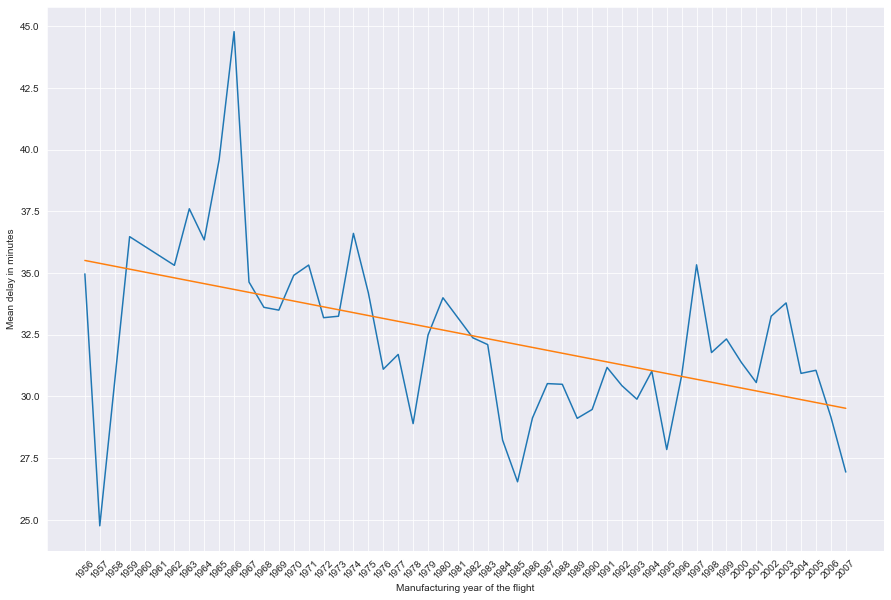

In [18]:
#setting the darker grid style
sns.set_style("darkgrid")

#setting the size of the figure
fig,ax = plt.subplots(figsize = (15, 10))

#rotating the xticks to increase readability
plt.xticks(np.arange(min(delays_byyear.index), max(delays_byyear.index)+1, 1.0), rotation = 45)

#setting the label for the x and y axes
ax.set(xlabel = "Manufacturing year of the flight", ylabel = "Mean delay in minutes")

sns.lineplot(ax=ax, x = delays_byyear.index, y = delays_byyear.values)

#plotting the trend line for referencce
trend = np.poly1d(np.polyfit(delays_byyear.index, delays_byyear.values, 1))
plt.plot(delays_byyear.index,trend(delays_byyear.index))             

#### Do older planes suffer more delays?

Yes, there seems to be a declining trend between manufacturing year of the flight and departure delays. Meaning, newer planes suffer less delays and that older planes still in use seem to suffer greater delays.